In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

!pip install pycountry
import pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.1 MB/s eta 0:00:00


# Parte 1. COVID

# 1. Ingesta y Diagnóstico

In [3]:
url_covid = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" \
            "csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

df_covid = pd.read_csv(url_covid)
print("Shape:", df_covid.shape)
print("\nTipos de datos:")
print(df_covid.dtypes)
print("\nPrimeras filas:")
display(df_covid.head())
print("\nNulos por columna:")
display(df_covid.isnull().sum())

Shape: (289, 1147)

Tipos de datos:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

Primeras filas:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288



Nulos por columna:


,0
Province/State,198
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
3/5/23,0
3/6/23,0
3/7/23,0
3/8/23,0


# 2. Corrección de columnas

In [4]:
df_covid = df_covid.rename(columns={
    "Province/State": "province_state",
    "Country/Region": "country_region",
    "Lat": "lat",
    "Long": "long"
})
print("\nColumnas renombradas:")
print(df_covid.columns[:10])


Columnas renombradas:
Index(['province_state', 'country_region', 'lat', 'long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='object')


# 3. Pivoteo wide → long

In [5]:
date_cols = df_covid.columns[4:]
df_long = df_covid.melt(
    id_vars=["province_state", "country_region", "lat", "long"],
    value_vars=date_cols,
    var_name="date",
    value_name="confirmed"
)

df_long["date"] = pd.to_datetime(df_long["date"], format="%m/%d/%y", errors="coerce")

# 4. Normalización de tipos

In [6]:
df_long["lat"] = df_long["lat"].astype(float)
df_long["long"] = df_long["long"].astype(float)

df_long["confirmed"] = pd.to_numeric(df_long["confirmed"], errors="coerce")
df_long.loc[df_long["confirmed"] < 0, "confirmed"] = np.nan

df_long["confirmed"] = df_long["confirmed"].fillna(0)

print("\nTipos finales:")
print(df_long.dtypes)
display(df_long.head())


Tipos finales:
province_state            object
country_region            object
lat                      float64
long                     float64
date              datetime64[ns]
confirmed                float64
dtype: object


,province_state,country_region,lat,long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0


# 5. Texto y categorías

In [7]:
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df_long["iso3"] = df_long["country_region"].apply(get_iso3)

# 6. Reglas de calidad y validaciones


Filas con lat fuera de rango: 2286
Filas con long fuera de rango: 2286


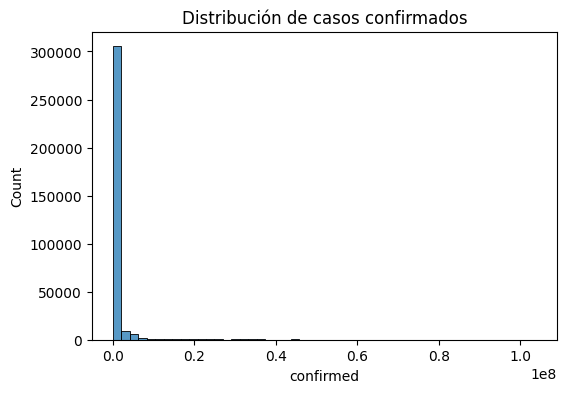

In [8]:
invalid_lat = df_long[~df_long["lat"].between(-90, 90)]
invalid_long = df_long[~df_long["long"].between(-180, 180)]

print("\nFilas con lat fuera de rango:", invalid_lat.shape[0])
print("Filas con long fuera de rango:", invalid_long.shape[0])

plt.figure(figsize=(6,4))
sns.histplot(df_long["confirmed"], bins=50)
plt.title("Distribución de casos confirmados")
plt.show()

# Parte 2. Chipotle

# 1. Ingesta y diagnóstico

In [9]:
url_chipotle = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df_chip = pd.read_csv(url_chipotle, sep='\t')

print("\nShape Chipotle:", df_chip.shape)
print("\nTipos de datos:")
print(df_chip.dtypes)
display(df_chip.head())
display(df_chip.isnull().sum())


Shape Chipotle: (4622, 5)

Tipos de datos:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0


# 2. Normalización de precios y tipos

In [14]:
df_chip["item_price_num"] = (
    df_chip["item_price"].replace('[$,]', '', regex=True).astype(float)
)

df_chip["quantity"] = pd.to_numeric(df_chip["quantity"], errors='coerce').fillna(1).astype(int)
df_chip.loc[df_chip["quantity"] < 1, "quantity"] = 1

df_chip["unit_price"] = df_chip["item_price_num"] / df_chip["quantity"]

df_chip["line_total"] = round(df_chip["unit_price"] * df_chip["quantity"], 2)

# 3. Limpieza de texto y categorías

In [15]:
df_chip["item_name_norm"] = df_chip["item_name"].str.lower().str.strip()

# 4. Validaciones


Validaciones:
Precios negativos: 0
UnitPrice negativos: 0
Cantidades < 1: 0

Items con outliers de precio: 8


,order_id,quantity,item_name,choice_description,item_price,item_price_num,unit_price,line_total,item_name_norm,mean,std,count,zscore
1,1,1,Izze,[Clementine],$3.39,3.39,3.39,3.39,izze,3.39,0.0,20,inf
24,12,1,Izze,[Grapefruit],$3.39,3.39,3.39,3.39,izze,3.39,0.0,20,inf
47,21,1,Izze,[Blackberry],$3.39,3.39,3.39,3.39,izze,3.39,0.0,20,inf
66,30,1,Izze,[Blackberry],$3.39,3.39,3.39,3.39,izze,3.39,0.0,20,inf
111,49,1,Chips and Tomatillo Red Chili Salsa,NaN,$2.95,2.95,2.95,2.95,chips and tomatillo red chili salsa,2.95,0.0,48,-inf


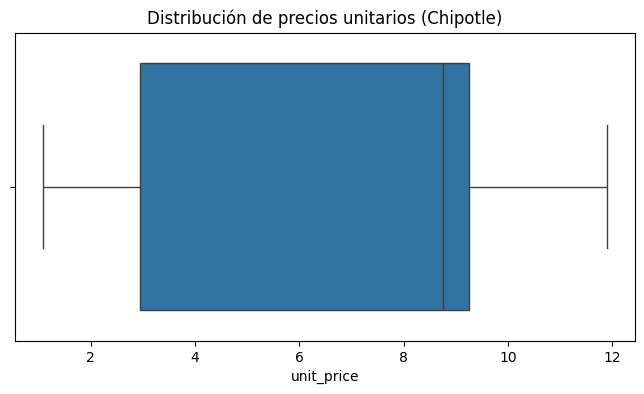

In [16]:
invalid_prices = df_chip[df_chip["item_price_num"] < 0]
invalid_units = df_chip[df_chip["unit_price"] < 0]
invalid_qty = df_chip[df_chip["quantity"] < 1]

print("\nValidaciones:")
print("Precios negativos:", invalid_prices.shape[0])
print("UnitPrice negativos:", invalid_units.shape[0])
print("Cantidades < 1:", invalid_qty.shape[0])

stats = df_chip.groupby("item_name_norm")["unit_price"].agg(["mean", "std", "count"])
df_chip = df_chip.merge(stats, on="item_name_norm", how="left", suffixes=("", "_stats"))
df_chip["zscore"] = (df_chip["unit_price"] - df_chip["mean"]) / df_chip["std"]
outliers = df_chip[np.abs(df_chip["zscore"]) > 3]

print("\nItems con outliers de precio:", outliers["item_name_norm"].nunique())
display(outliers.head())

plt.figure(figsize=(8,4))
sns.boxplot(x=df_chip["unit_price"])
plt.title("Distribución de precios unitarios (Chipotle)")
plt.show()